# WK8 Data Visualization <hr></hr>

Name: **Joshua M. Bito-on** <br>
Course: **CPE2A**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\romme\Desktop\MATHEDA Bito-on\WK8\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


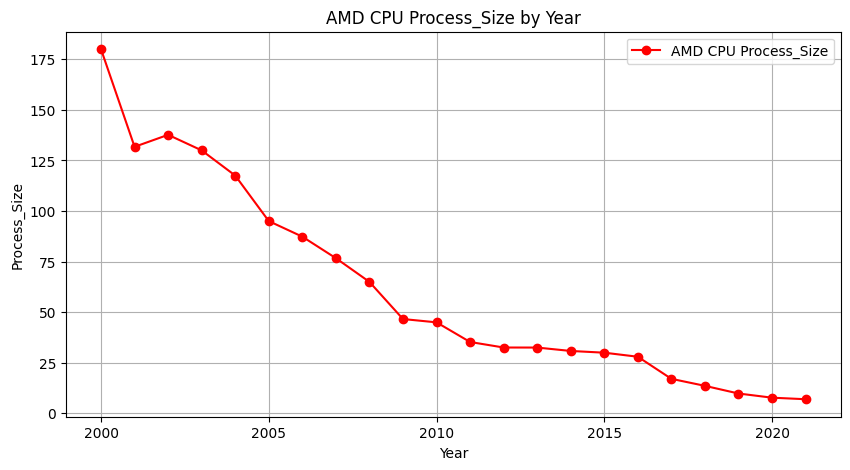

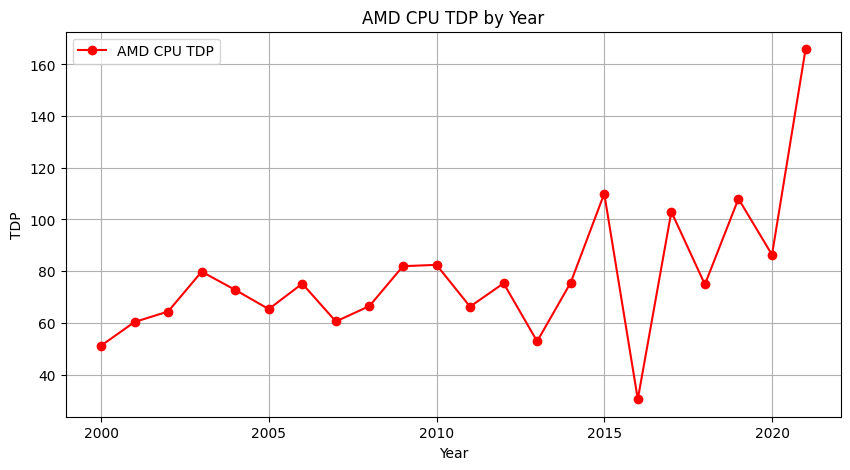

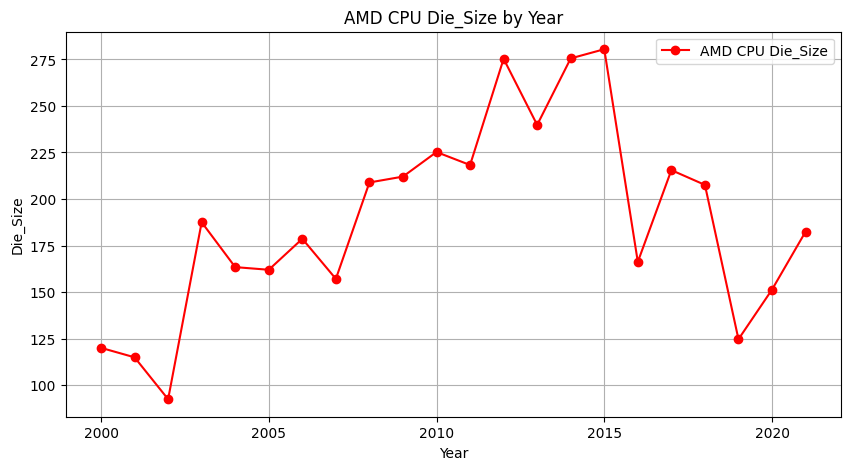

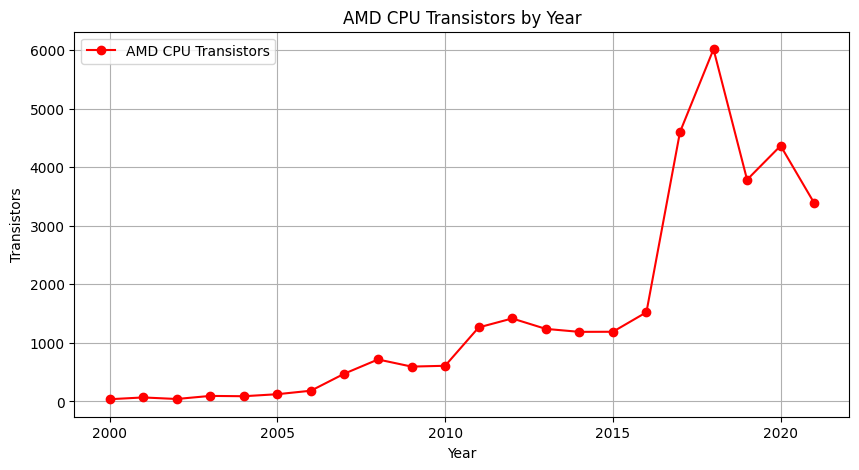

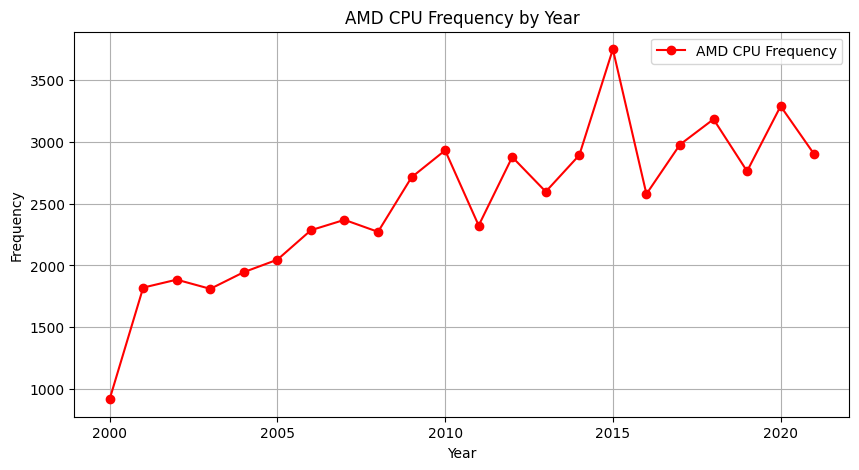

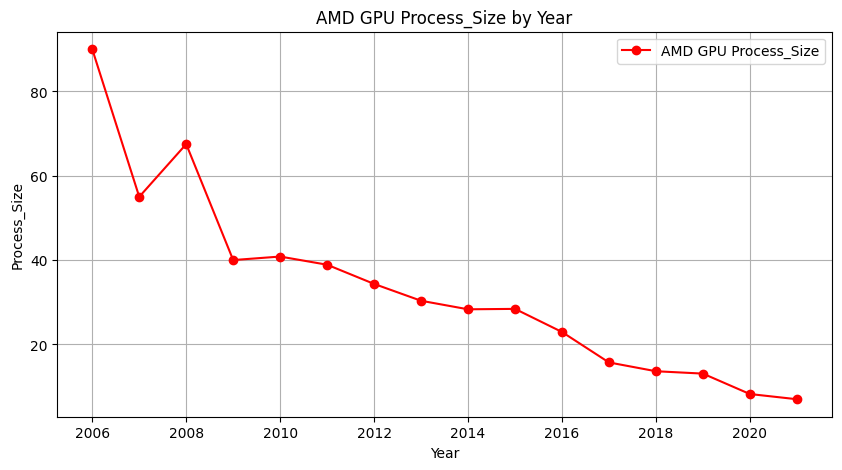

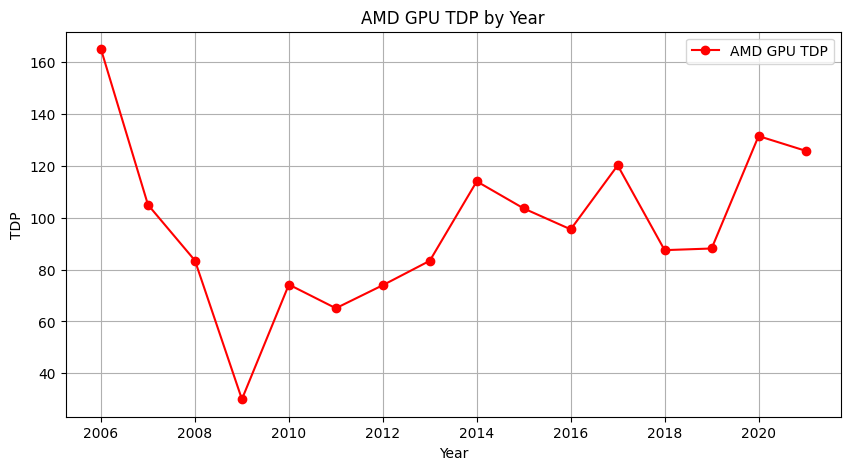

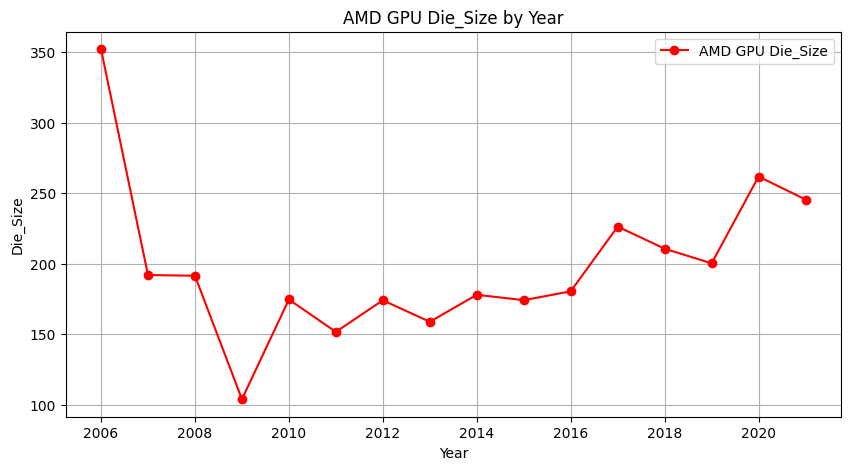

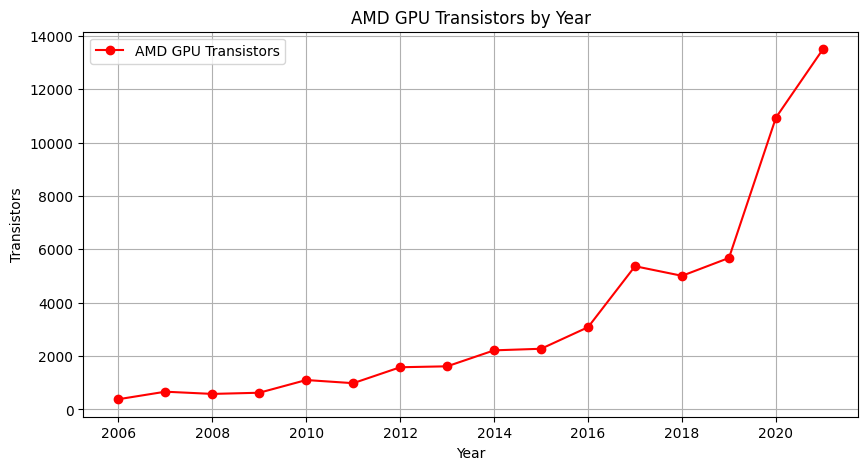

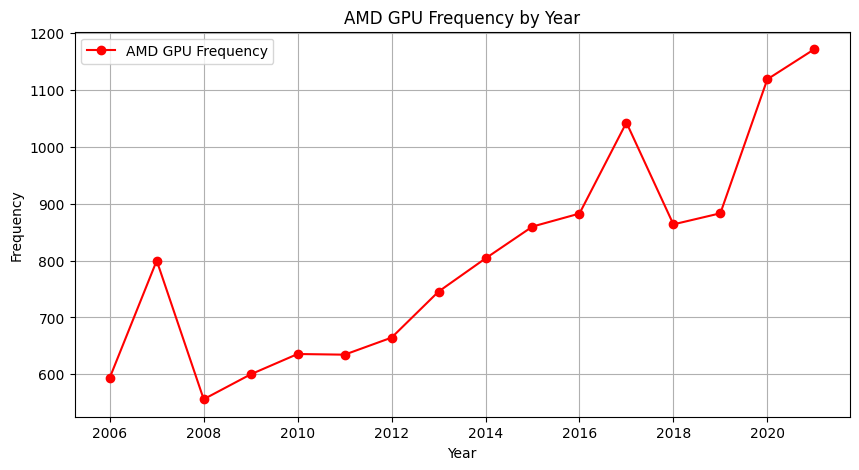

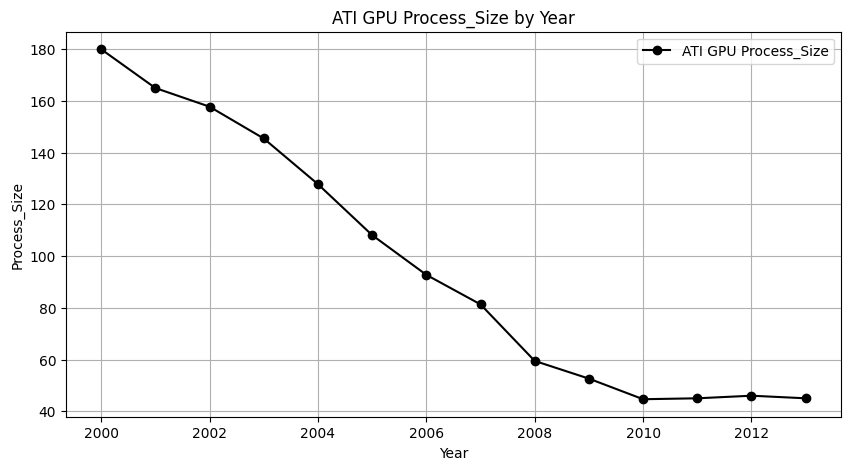

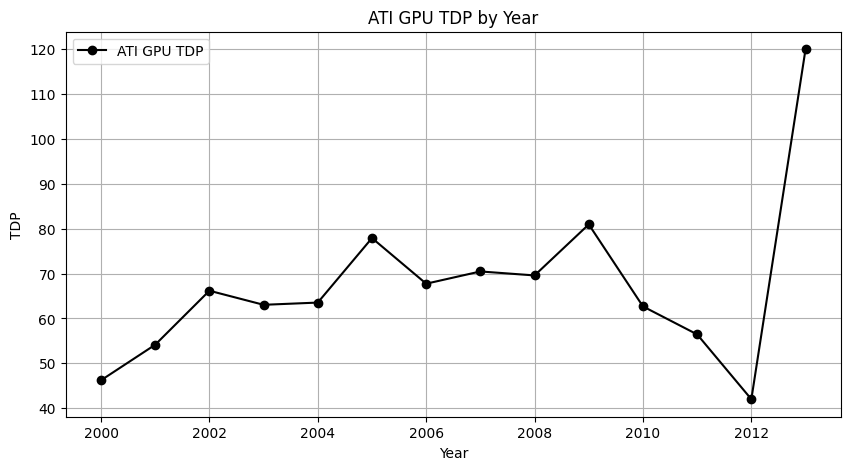

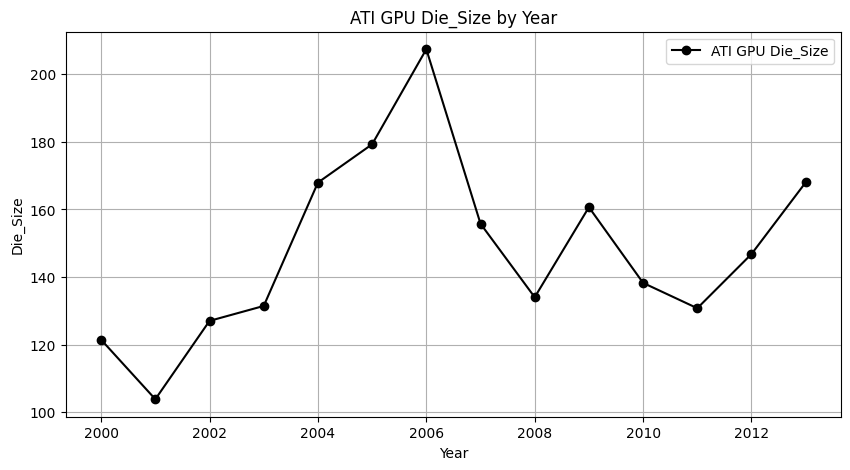

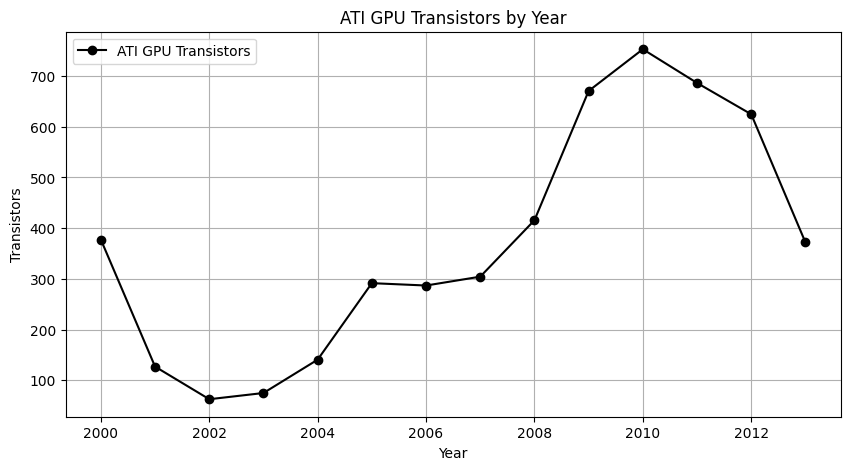

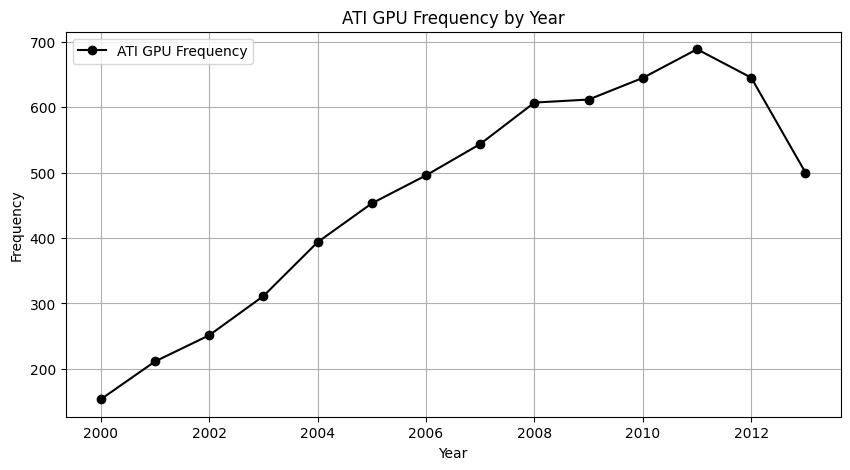

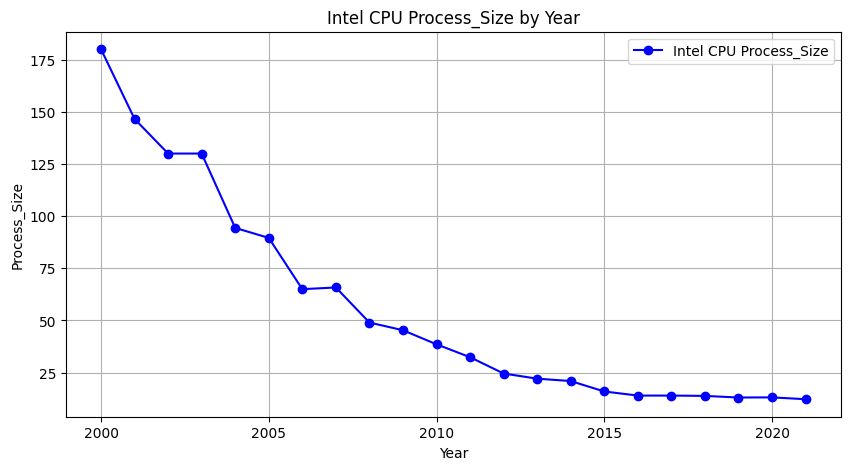

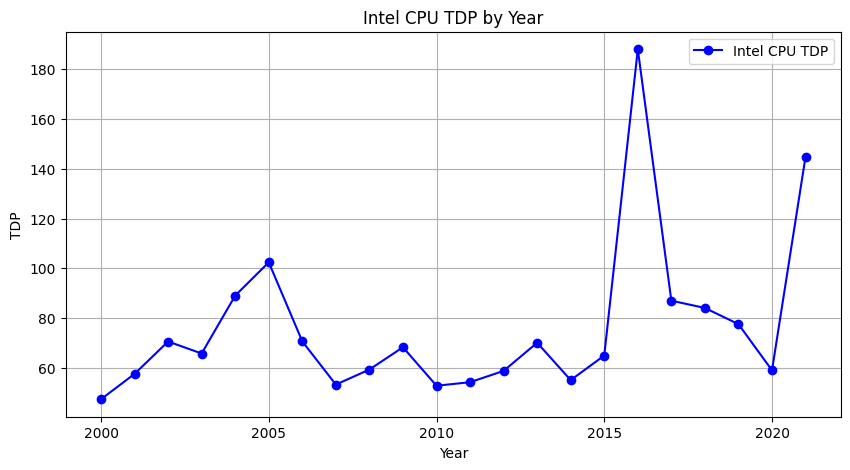

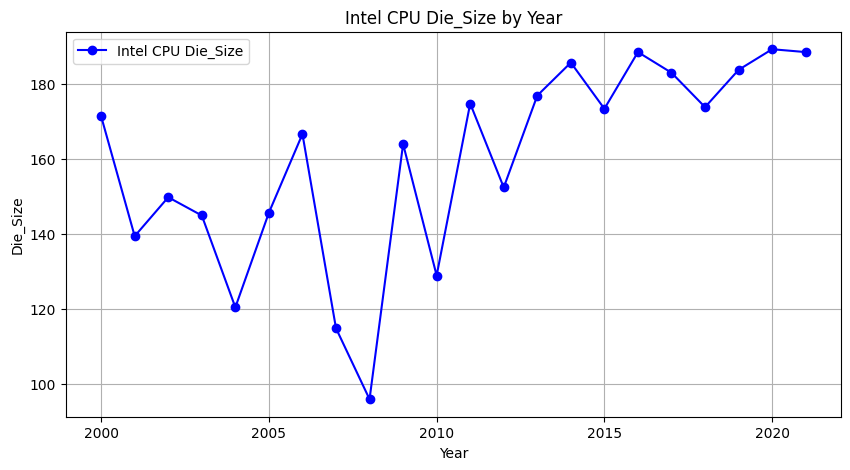

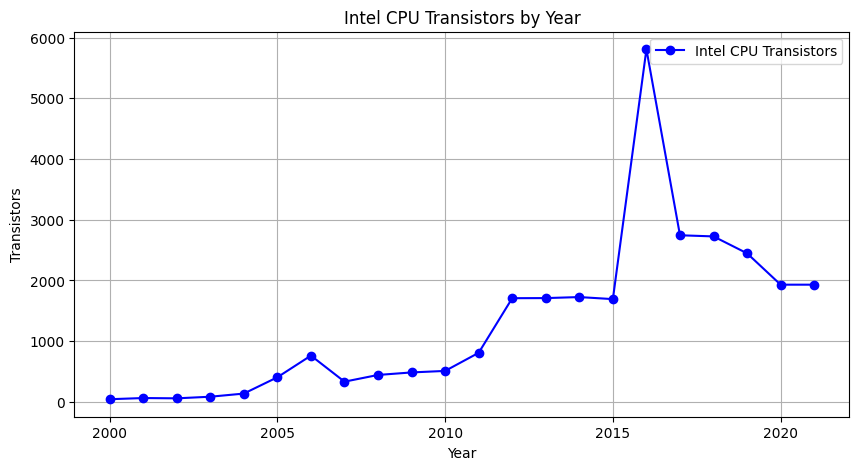

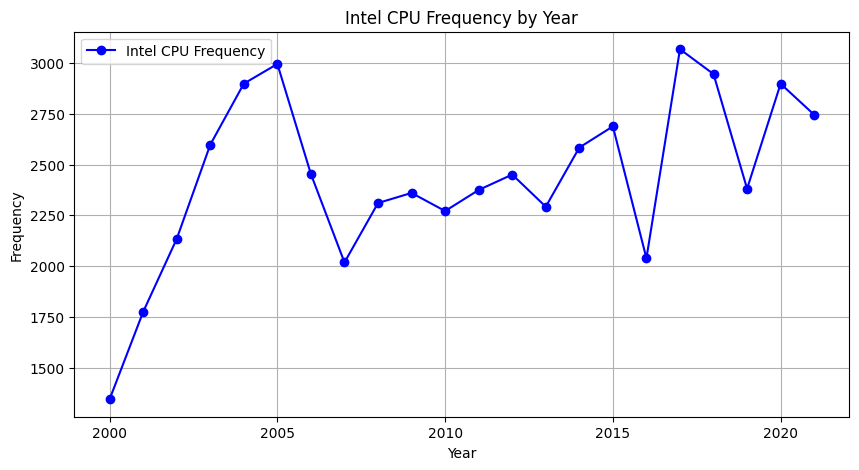

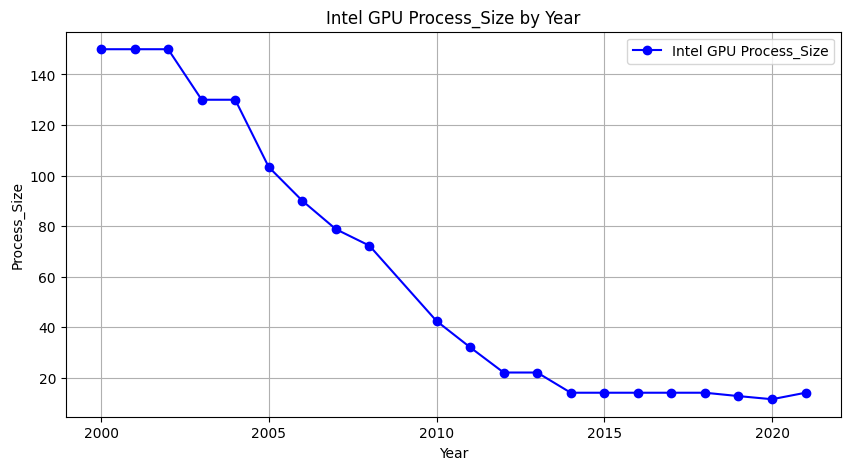

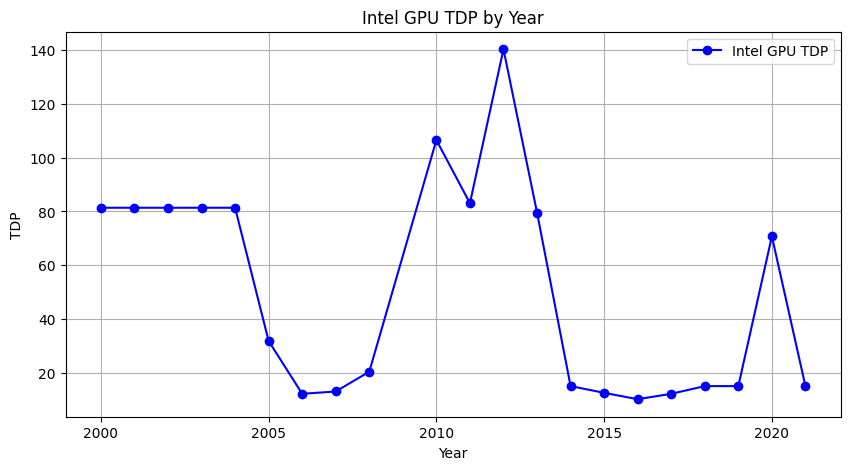

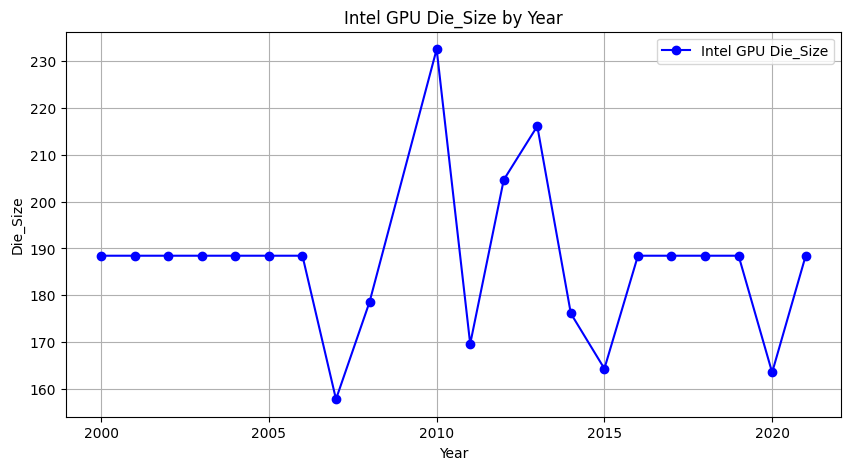

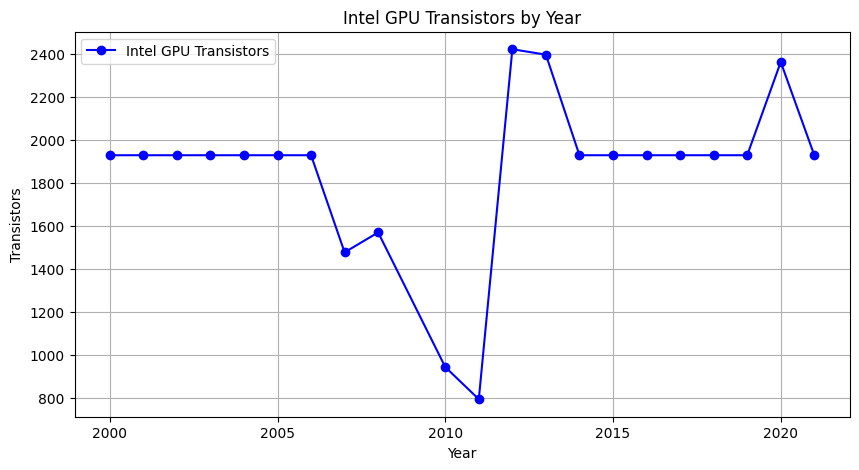

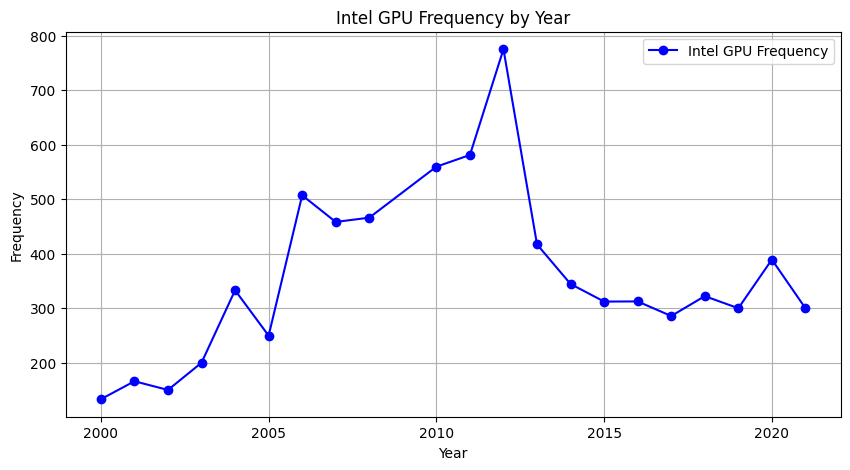

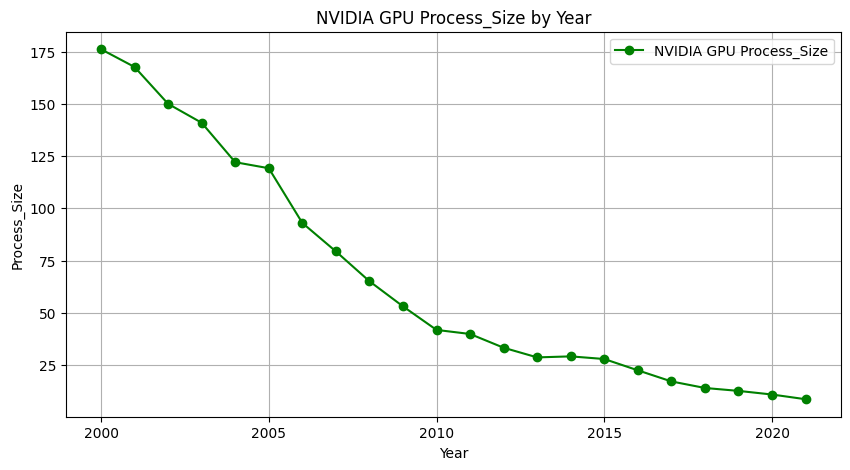

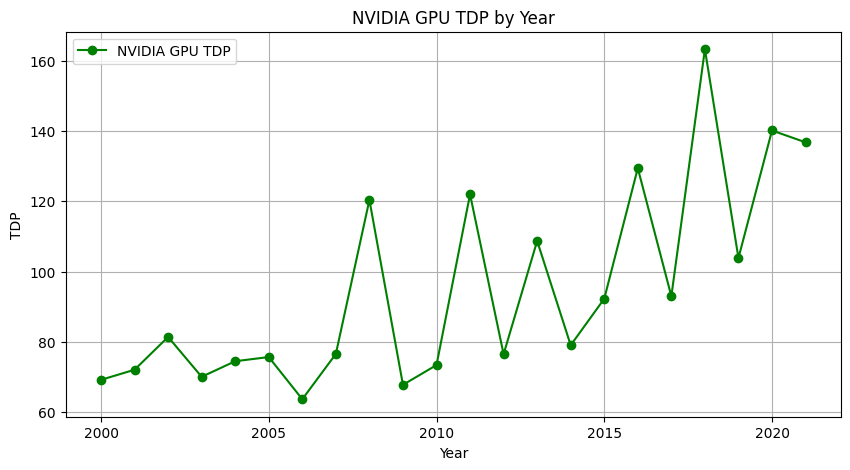

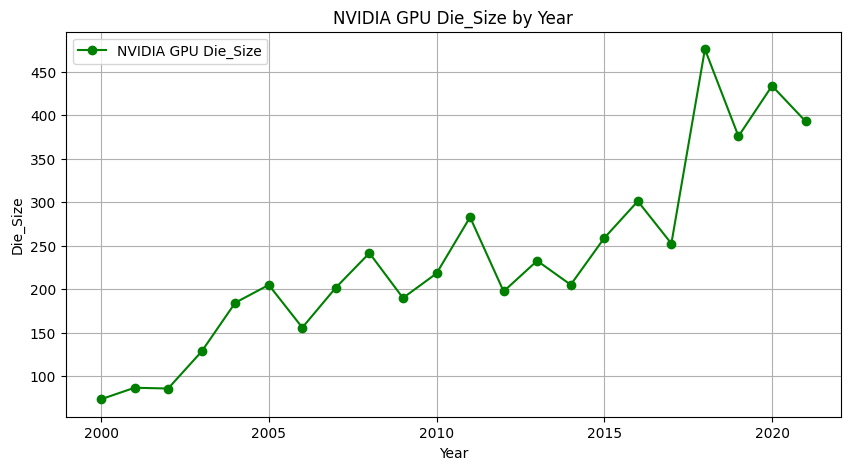

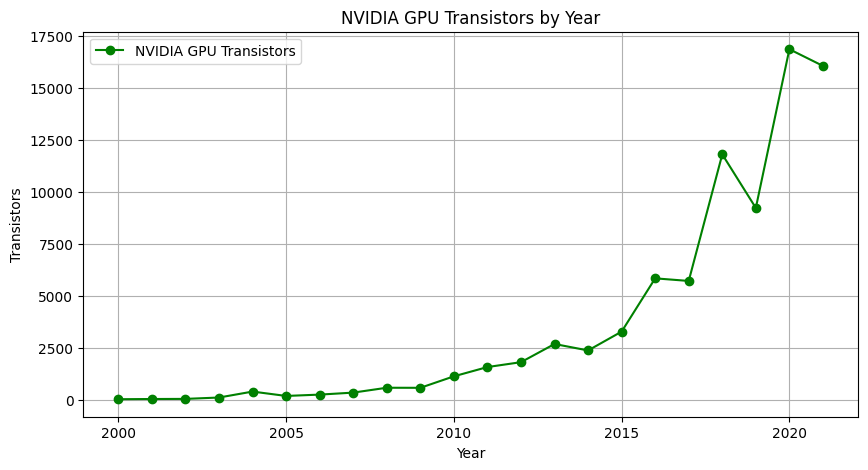

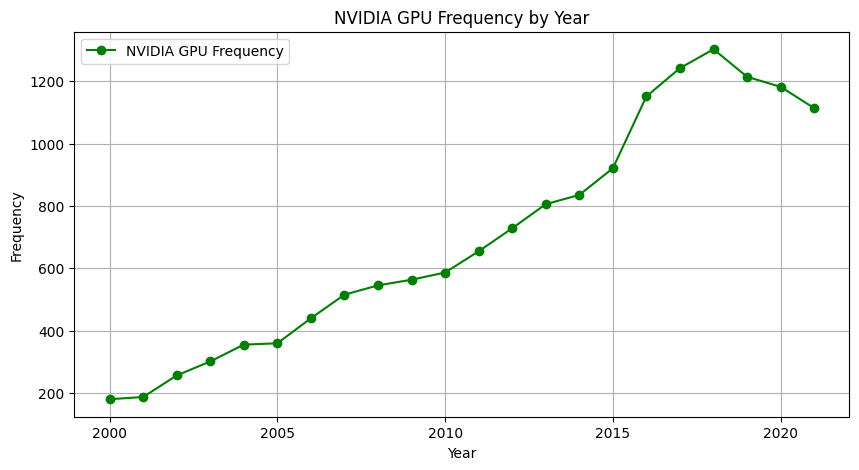

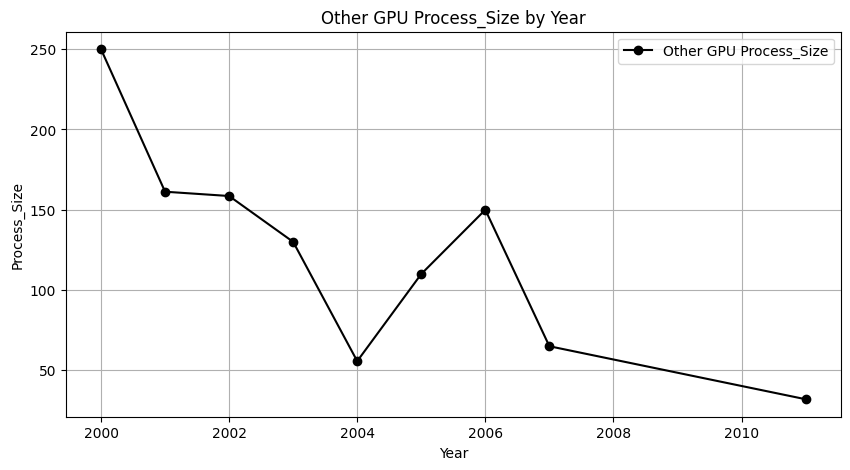

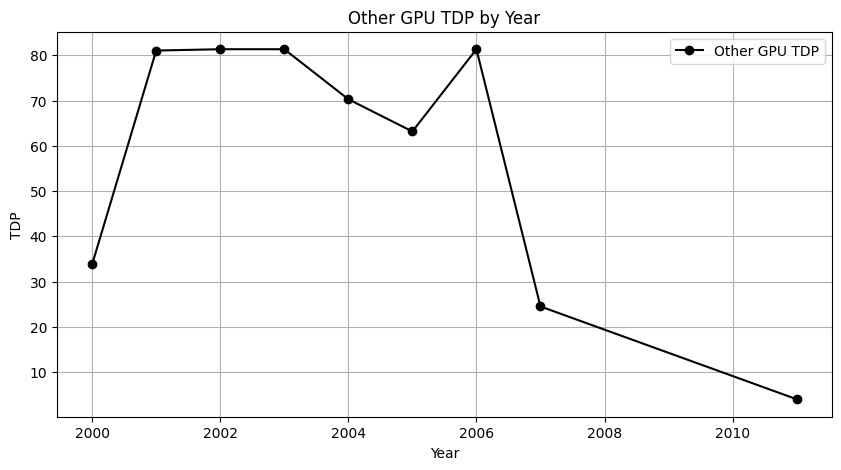

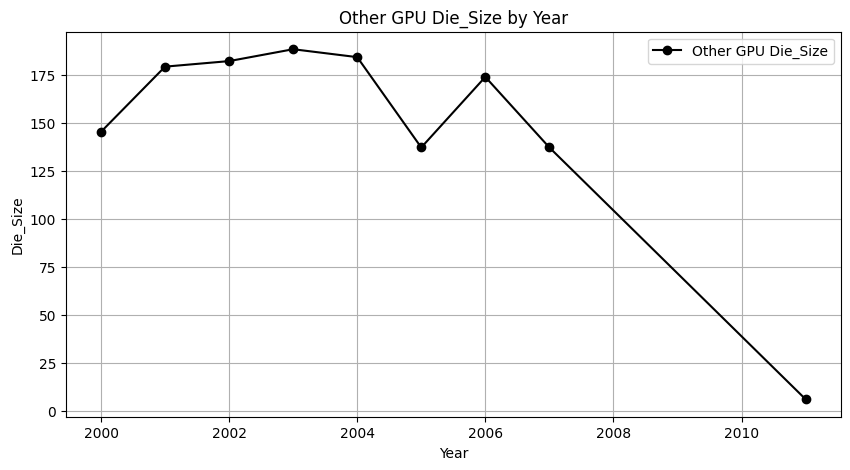

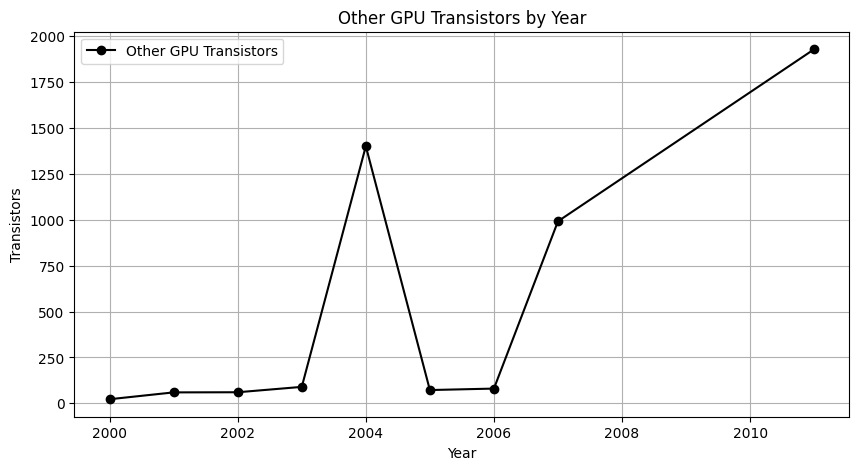

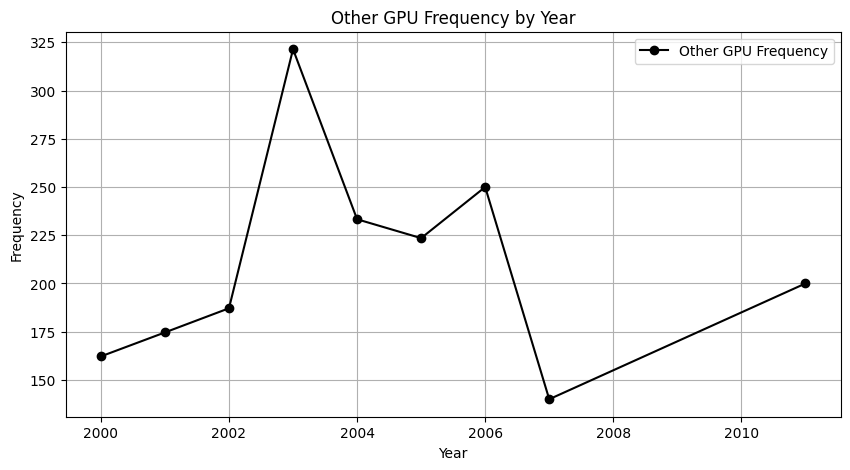

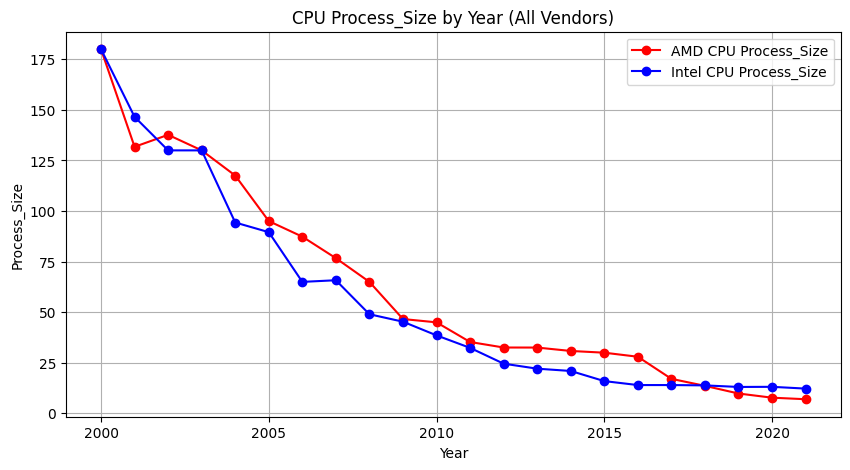

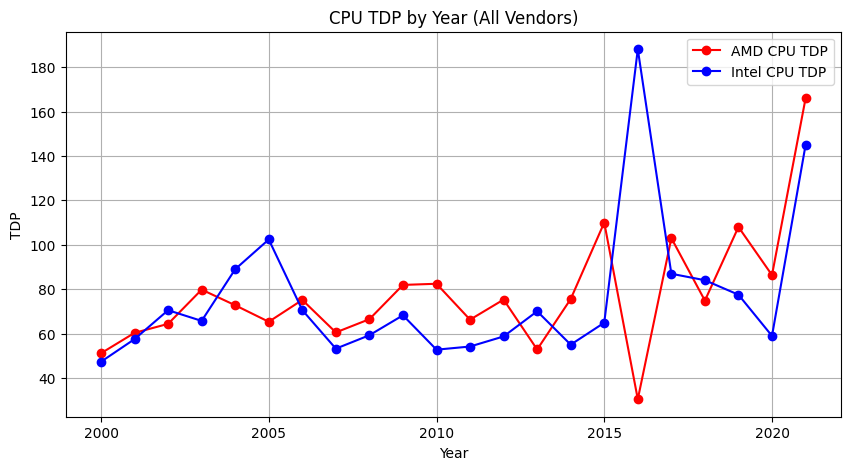

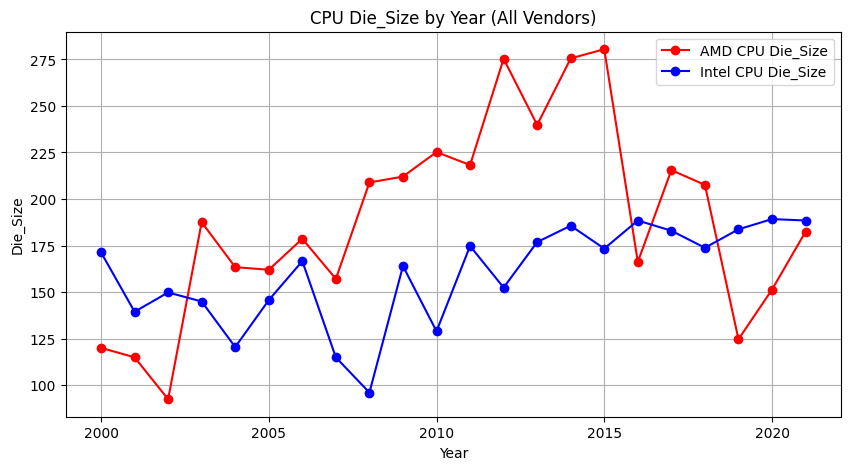

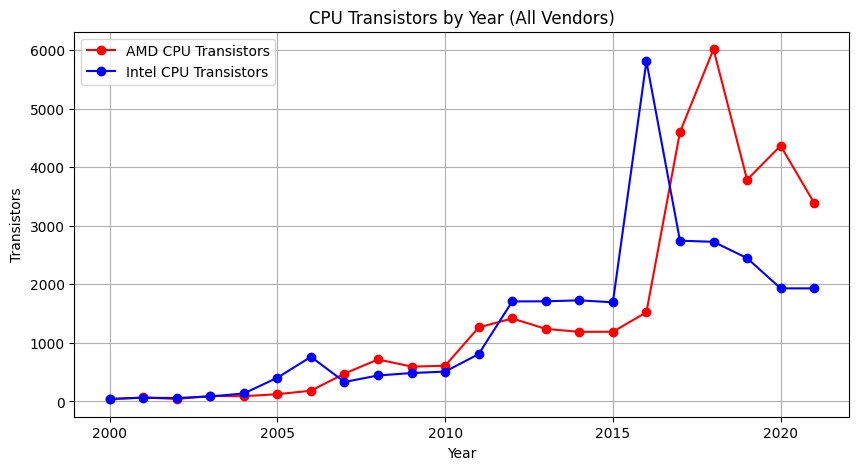

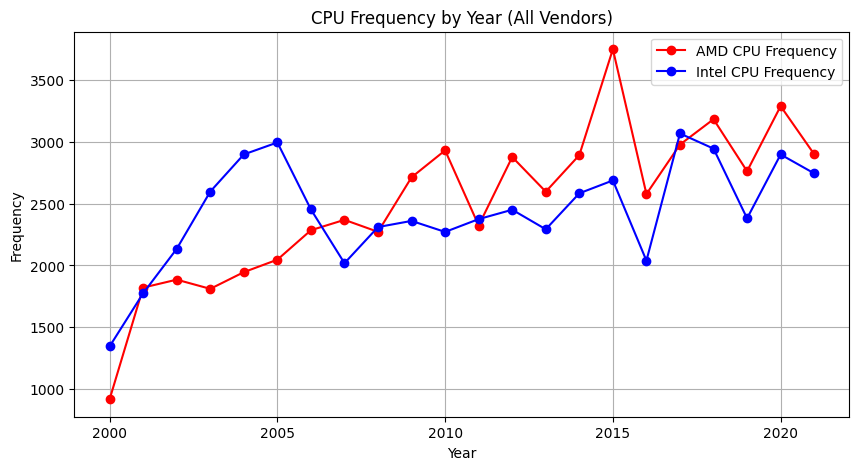

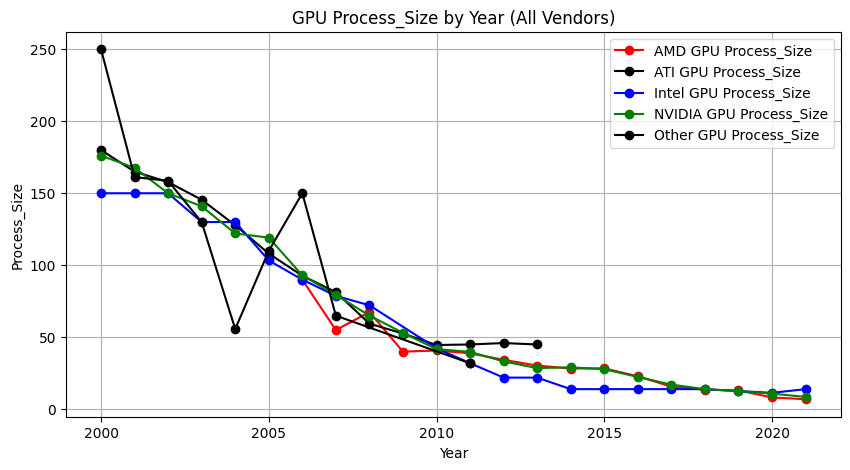

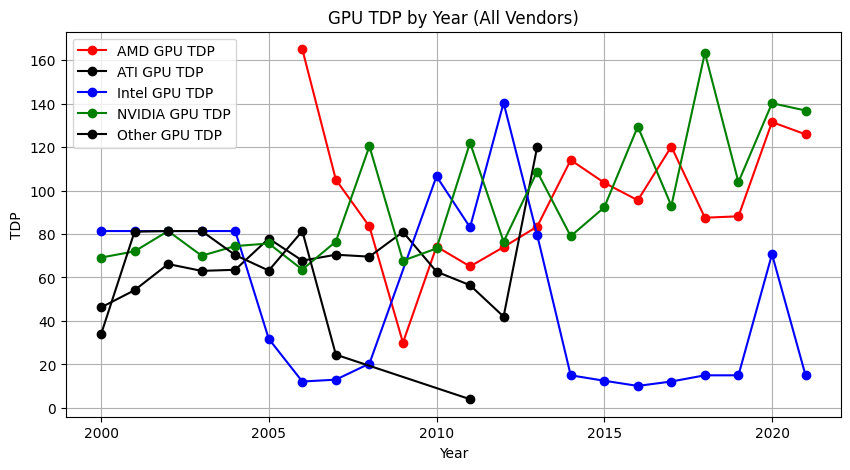

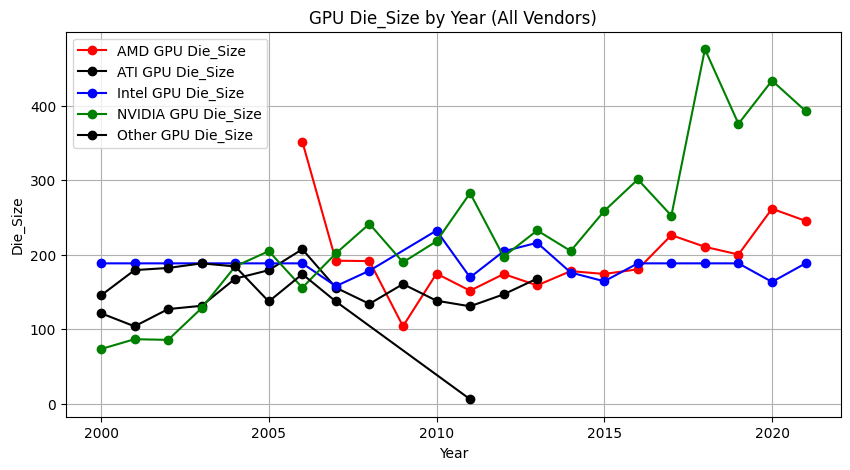

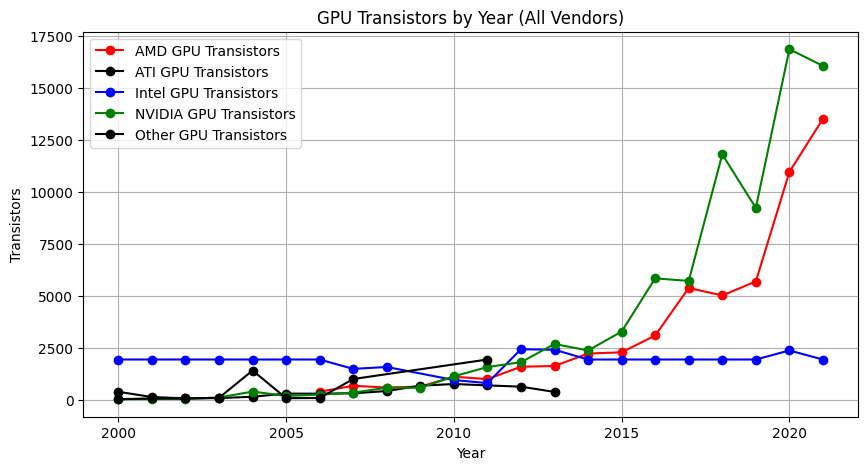

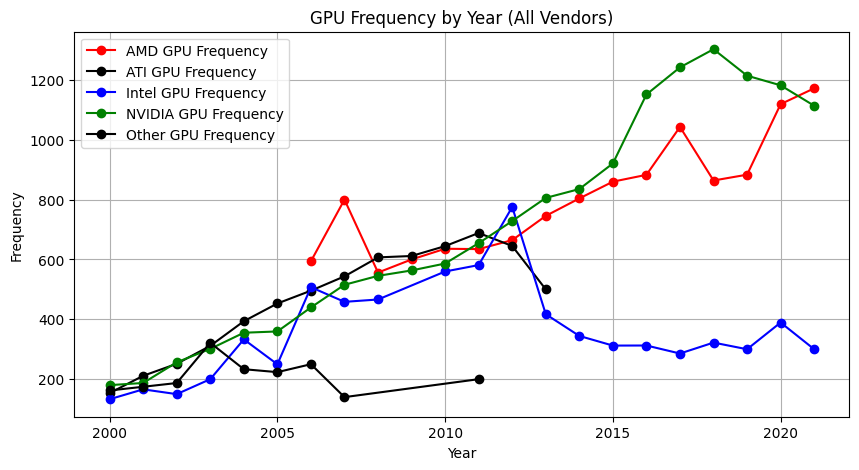

In [12]:
# Extract year from Date column
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

# Drop rows where Year is NaN (failed conversion)
df = df.dropna(subset=['Year'])

# Convert Year to integer type
df['Year'] = df['Year'].astype(int)

# Select relevant columns and group by Year, Vendor, and Type
numeric_columns = ['Process_Size', 'TDP', 'Die_Size', 'Transistors', 'Frequency']
grouped_df = df.groupby(['Year', 'Vendor', 'Type'])[numeric_columns].mean().reset_index()

# Define a color mapping for vendors
vendor_colors = {
    'AMD': 'red',
    'Intel': 'blue',
    'NVIDIA': 'green'
}

# Function to plot individual line graphs for each vendor
def plot_individual_data(vendor, chip_type, attribute):
    subset = grouped_df[(grouped_df['Vendor'] == vendor) & (grouped_df['Type'] == chip_type)]
    
    if subset.empty:
        return  # Skip if no data available
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Year'], subset[attribute], marker='o', 
             label=f'{vendor} {chip_type} {attribute}', 
             color=vendor_colors.get(vendor, 'black'))  # Default to black if vendor not in color map
    
    plt.title(f'{vendor} {chip_type} {attribute} by Year')
    plt.xlabel('Year')
    plt.ylabel(attribute)
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot combined line graphs for all vendors
def plot_combined_data(chip_type, attribute):
    plt.figure(figsize=(10, 5))
    
    for vendor in grouped_df['Vendor'].unique():
        subset = grouped_df[(grouped_df['Vendor'] == vendor) & (grouped_df['Type'] == chip_type)]
        
        if subset.empty:
            continue  # Skip if no data available
        
        plt.plot(subset['Year'], subset[attribute], marker='o', 
                 label=f'{vendor} {chip_type} {attribute}', 
                 color=vendor_colors.get(vendor, 'black'))  # Default to black if vendor not in color map
    
    plt.title(f'{chip_type} {attribute} by Year (All Vendors)')
    plt.xlabel('Year')
    plt.ylabel(attribute)
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract unique vendors and types
vendors = grouped_df['Vendor'].unique()
types = grouped_df['Type'].unique()

# Generate individual plots for each vendor-type-attribute combination
for vendor in vendors:
    for chip_type in types:
        for attribute in numeric_columns:
            plot_individual_data(vendor, chip_type, attribute)

# Generate combined plots for each type-attribute combination
for chip_type in types:
    for attribute in numeric_columns:
        plot_combined_data(chip_type, attribute)